# CREDIT CARD FRAUD DETECTION
In the field of "Credit Card Fraud Detection," various techniques and algorithms are employed to identify and prevent fraudulent transactions in credit card transactions. This involves analyzing transaction data, detecting unusual patterns or anomalies, and implementing security measures to protect cardholders from unauthorized and fraudulent activities.

## Import Required Library 

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Read csv file
df_train= pd.read_csv("fraudTrain.csv")
df_test=pd.read_csv('fraudTest.csv')


In [3]:
# Show Train Dataset
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
# Show Test Dataset
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
# About Train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [6]:
# Detected null values
df_train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
# How many Row and columns
print(df_train.shape)

(1296675, 23)


## Data Preprocessing
Data preprocessing is a critical step in machine learning and data analysis.Common tasks include handling missing values 

In [8]:
# Show Train Dataset
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [9]:
# Drop unused columns Train Dataset
drop_columns = ['Unnamed: 0','cc_num','merchant','trans_num','unix_time','first','last','street','dob','trans_date_trans_time']
df_train.drop(columns=drop_columns,inplace=True)


In [10]:
# Drop unused columns Test Dataset
drop_columns = ['Unnamed: 0','cc_num','merchant','trans_num','unix_time','first','last','street','dob','trans_date_trans_time']
df_test.drop(columns=drop_columns,inplace=True)


In [11]:
# After dropping, how does the Test dataset appear
df_test.head()

,category,amt,gender,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud
0,personal_care,2.86,M,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,33.986391,-81.200714,0
1,personal_care,29.84,F,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",39.450498,-109.960431,0
2,health_fitness,41.28,F,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",40.495810,-74.196111,0
3,misc_pos,60.05,M,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,28.812398,-80.883061,0
4,travel,3.19,M,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,44.959148,-85.884734,0


In [12]:
# After dropping, how does the Train dataset appear
df_train.head()

,category,amt,gender,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud
0,misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0
1,grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0
2,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,43.150704,-112.154481,0
3,gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,47.034331,-112.561071,0
4,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,38.674999,-78.632459,0


In [13]:
df_train.nunique()

category           14
amt             52928
gender              2
city              894
state              51
zip               970
lat               968
long              969
city_pop          879
job               494
merch_lat     1247805
merch_long    1275745
is_fraud            2
dtype: int64

## EDA
Exploratory Data Analysis (EDA) is the process of visually and statistically analyzing a dataset to understand its key characteristics, distribution, patterns, and relationships between variables. EDA helps data analysts gain insights and make informed decisions about subsequent data processing and modeling steps.

In [14]:
df_train.head()

,category,amt,gender,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud
0,misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0
1,grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0
2,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,43.150704,-112.154481,0
3,gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,47.034331,-112.561071,0
4,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,38.674999,-78.632459,0


In [15]:
# Code counts and displays 'is_fraud' column value frequencies.
df_train['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [16]:
# describe the Train data set
df_train.describe()

,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,5.109788e+00,1.377109e+01,7.586269e-02
min,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.902779e+01,-1.666712e+02,0.000000e+00
25%,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,3.473357e+01,-9.689728e+01,0.000000e+00
50%,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,3.936568e+01,-8.743839e+01,0.000000e+00
75%,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,4.195716e+01,-8.023680e+01,0.000000e+00
max,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,6.751027e+01,-6.695090e+01,1.000000e+00


In [17]:
df_train["amt"].describe()


count    1.296675e+06
mean     7.035104e+01
std      1.603160e+02
min      1.000000e+00
25%      9.650000e+00
50%      4.752000e+01
75%      8.314000e+01
max      2.894890e+04
Name: amt, dtype: float64

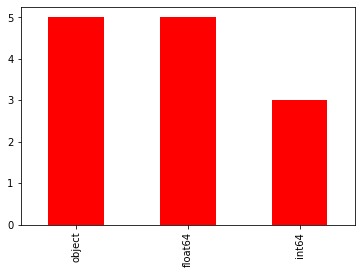

In [18]:
# It provides a visual representation of the data 
df_train.dtypes.value_counts().plot(kind='bar', color="red");


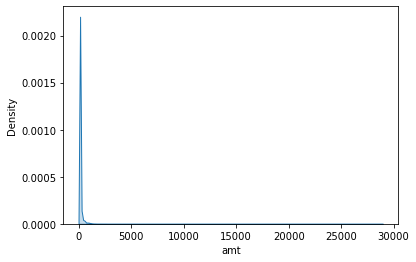

In [19]:
sns.kdeplot(df_train["amt"], fill=True);


The code is used to visualize the percentage of fraudulent entries in a dataset using a bar plot. It calculates the count of "fraud" and "non-fraud" entries in the 'is_fraud' column and plots them to represent the percentage of fraud in the dataset visually.

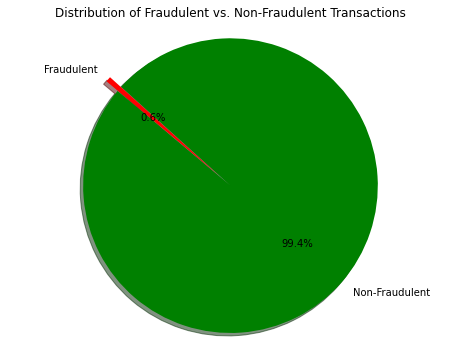

In [20]:
import matplotlib.pyplot as plt

# Assuming 'is_fraud' is a binary column (0 for non-fraud, 1 for fraud)
fraud_count = df_train['is_fraud'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
labels = ['Non-Fraudulent', 'Fraudulent']
sizes = fraud_count.values
colors = ['green', 'red']
explode = (0.1, 0)  # Explode the first slice (Non-Fraudulent)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Transactions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [21]:
# Assuming your DataFrame is named 'df'
column_names = list(df_train.columns)

# Print all column names
print(column_names)


['category', 'amt', 'gender', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'merch_lat', 'merch_long', 'is_fraud']


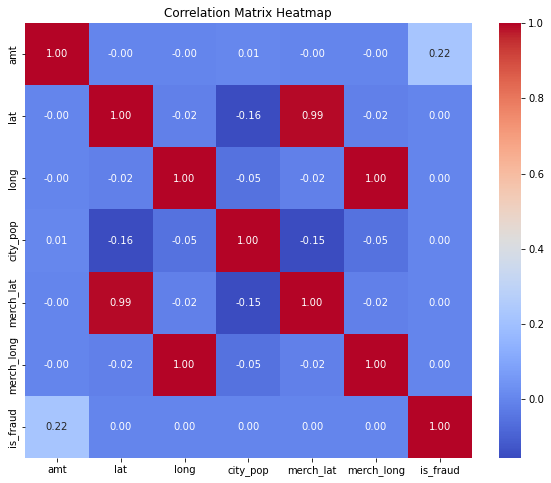

In [22]:

# Select the columns you want to include in the correlation analysis
selected_columns = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'is_fraud']

# Create a subset DataFrame with selected columns
subset_df = df_train[selected_columns]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


Text(0.5, 1.0, 'Places of missing values in column')

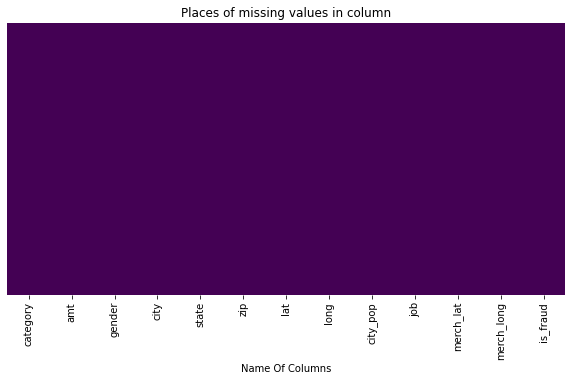

In [23]:
# Visulaizing null values through heatmap.
plt.figure(figsize=(10, 5))
sns.heatmap(df_train.isnull(), cbar=False, yticklabels=False,cmap='viridis')
plt.xlabel("Name Of Columns")
plt.title("Places of missing values in column")

array([[<AxesSubplot:title={'center':'amt'}>,
        <AxesSubplot:title={'center':'zip'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'city_pop'}>,
        <AxesSubplot:title={'center':'merch_lat'}>],
       [<AxesSubplot:title={'center':'merch_long'}>,
        <AxesSubplot:title={'center':'is_fraud'}>, <AxesSubplot:>]],
      dtype=object)

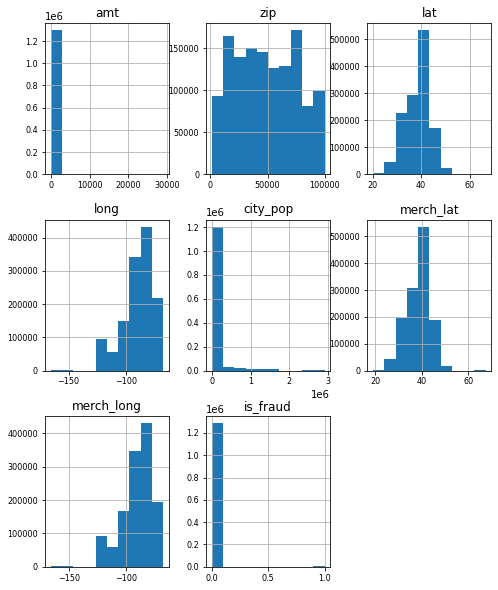

In [24]:
#Get an overview distribution of each column
df_train.hist(figsize=(8, 10), xlabelsize=8, ylabelsize=8)

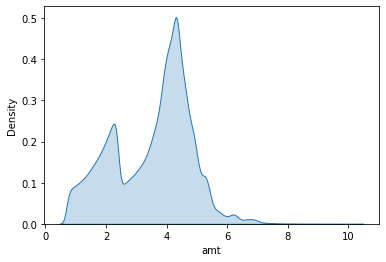

In [25]:
df_train["amt"] = np.log1p(df_train["amt"])
sns.kdeplot(df_train["amt"], fill=True);

In [26]:
df_train.head()

,category,amt,gender,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud
0,misc_net,1.786747,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0
1,grocery_pos,4.684259,F,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0
2,entertainment,5.398660,M,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,43.150704,-112.154481,0
3,gas_transport,3.828641,M,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,47.034331,-112.561071,0
4,misc_pos,3.760269,M,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,38.674999,-78.632459,0


#### A Label Encoder is a preprocessing technique used in machine learning and data analysis to convert categorical or textual data into numerical values

In [27]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to be label encoded
categorical_columns = ['category', 'gender', 'city', 'state', 'job']

# Initialize the label encoder
label_encoder = LabelEncoder()

# Loop through each categorical column and apply label encoding
for column in categorical_columns:
    df_train[column] = label_encoder.fit_transform(df_train[column])


In [28]:
df_train.head()

,category,amt,gender,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud
0,8,1.786747,0,526,27,28654,36.0788,-81.1781,3495,370,36.011293,-82.048315,0
1,4,4.684259,0,612,47,99160,48.8878,-118.2105,149,428,49.159047,-118.186462,0
2,0,5.398660,1,468,13,83252,42.1808,-112.2620,4154,307,43.150704,-112.154481,0
3,2,3.828641,1,84,26,59632,46.2306,-112.1138,1939,328,47.034331,-112.561071,0
4,9,3.760269,1,216,45,24433,38.4207,-79.4629,99,116,38.674999,-78.632459,0


In [29]:
df_test.head()

,category,amt,gender,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud
0,personal_care,2.86,M,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,33.986391,-81.200714,0
1,personal_care,29.84,F,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",39.450498,-109.960431,0
2,health_fitness,41.28,F,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",40.495810,-74.196111,0
3,misc_pos,60.05,M,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,28.812398,-80.883061,0
4,travel,3.19,M,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,44.959148,-85.884734,0


In [30]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to be label encoded
categorical_columns = ['category', 'gender', 'city', 'state', 'job']

# Initialize the label encoder
label_encoder = LabelEncoder()

# Loop through each categorical column and apply label encoding
for column in categorical_columns:
    df_test[column] = label_encoder.fit_transform(df_test[column])


In [31]:
df_test.head()

,category,amt,gender,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud
0,10,2.86,1,157,39,29209,33.9659,-80.9355,333497,275,33.986391,-81.200714,0
1,10,29.84,0,16,43,84002,40.3207,-110.4360,302,392,39.450498,-109.960431,0
2,5,41.28,0,61,33,11710,40.6729,-73.5365,34496,259,40.495810,-74.196111,0
3,9,60.05,1,764,8,32780,28.5697,-80.8191,54767,407,28.812398,-80.883061,0
4,13,3.19,1,247,21,49632,44.2529,-85.0170,1126,196,44.959148,-85.884734,0


## Spliting The Dataset

In [32]:
#lets extract features and targets
X_train=df_train.drop(columns=['is_fraud'])
y_train=df_train['is_fraud']

In [49]:
from sklearn.metrics import confusion_matrix,accuracy_score,make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
model=LogisticRegression()


## Lets Built The Model

## LogisticRegression

In [50]:
from sklearn.metrics import confusion_matrix,accuracy_score,make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
model=LogisticRegression()

In [34]:
model.fit(X_train,y_train)

LogisticRegression()

In [35]:
#lets extract features and targets
X_test=df_test.drop(columns=['is_fraud'])
y_test=df_test['is_fraud']

In [36]:
y_pred=model.predict(X_test)

In [37]:
#find accuracy

acc=[]
roc=[]

ac=accuracy_score(y_test,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(y_test,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))


Accuracy 0.9961401355721147 ROC 0.5


## RandomForestClassifier


In [43]:
from sklearn.ensemble import RandomForestClassifier


In [45]:
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train,y_train)


RandomForestClassifier(n_estimators=50)

In [46]:

y_pred = model.predict(X_test)
y_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [47]:
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[551746   1828]
 [  2144      1]]


In [48]:
print("Accuracy Score: ", accuracy_score(y_test,y_pred))
print("Precision Score: ", precision_score(y_test,y_pred))
print("Recall Score: ",recall_score(y_test,y_pred))
print("F1 Score: ", f1_score(y_test,y_pred))

Accuracy Score:  0.9928525027936781
Precision Score:  0.0005467468562055768
Recall Score:  0.0004662004662004662
F1 Score:  0.0005032712632108706


## DecisionTreeClassifier

In [51]:
from sklearn.tree import DecisionTreeClassifier


In [52]:
clf = DecisionTreeClassifier()

In [53]:
clf.fit(X_train,y_train)


DecisionTreeClassifier()

In [54]:
y_pred = clf.predict(X_test)


In [55]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Accuracy: 0.9902450699004353
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           0.99    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      0.99      0.99    555719

Confusion Matrix:
 [[550294   3280]
 [  2141      4]]
